## Gagan Chordia
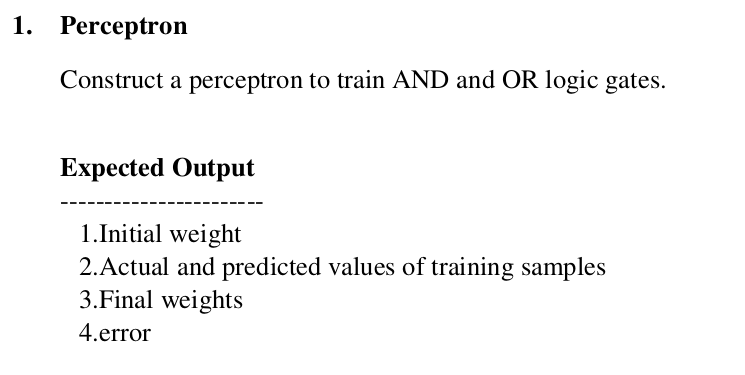

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from math import dist

In [2]:
lr = 0.8
epoch = 200

In [4]:
class Perceptron:
    def __init__(self):
        self.w = None
        self.b = None
        self.weights = []
        self.errors = []
        self.tolerance = 0.0
        
    def step_func(self, z):
        return 1 if (np.dot(self.w, z) > self.b) else 0
    
    def fit_and(self, x, y, epochs, learning_rate):
        self.w = np.ones(x.shape[1])
        self.w = -self.w
        print('Initial Weights -> ', self.w)
        self.b = -1
        
        for i in range(0, epochs):
            err = 0
            if len(self.weights) > 1:
                while(dist(self.weights[i - 1], self.weights[i - 2]) != self.tolerance and i < 10):
                    for x_temp, y_temp in zip(x, y):
                        y_pred = self.step_func(x_temp)
                        if (y_pred == 1 and y_temp == 0):
                            err += 1
                            self.w -= learning_rate * x_temp
                            self.b += learning_rate
                        elif(y_pred == 0 and y_temp == 1):
                            err += 1
                            self.w += learning_rate * x_temp
                            self.b -= learning_rate
                break
            else:
                for x_temp, y_temp in zip(x, y):
                    y_pred = self.step_func(x_temp)
                    if (y_pred == 1 and y_temp == 0):
                        err += 1
                        self.w -= learning_rate * x_temp
                        self.b += learning_rate
                    elif(y_pred == 0 and y_temp == 1):
                        err += 1
                        self.w += learning_rate * x_temp
                        self.b -= learning_rate

            self.weights.append(self.w)
            self.errors.append(err)
            
        print("Final Weights")
        print(self.weights)
        print("Errors")
        print(self.errors)
        
    def fit_or(self, x, y, epochs, learning_rate):
        self.w = np.ones(x.shape[1])
        self.w = -self.w
        print('Initial Weights -> ', self.w)
        self.b = -1
        
        for i in range(0, epochs):
            err = 0
            if len(self.weights) > 1:
                while(dist(self.weights[i - 1], self.weights[i - 2]) != self.tolerance or i > 10):
                    for x_temp, y_temp in zip(x, y):
                        y_pred = self.step_func(x_temp)
                        if (y_pred == 1 and y_temp == 0):
                            err += 1
                            self.w -= learning_rate * x_temp
                            self.b += learning_rate
                        elif(y_pred == 0 and y_temp == 1):
                            err += 1
                            self.w += learning_rate * x_temp
                            self.b -= learning_rate
                break
            else:
                for x_temp, y_temp in zip(x, y):
                    y_pred = self.step_func(x_temp)
                    if (y_pred == 1 and y_temp == 0):
                        err += 1
                        self.w -= learning_rate * x_temp
                        self.b += learning_rate
                    elif(y_pred == 0 and y_temp == 1):
                        err += 1
                        self.w += learning_rate * x_temp
                        self.b -= learning_rate

            self.weights.append(self.w)
            self.errors.append(err)
            
        print("Final Weights")
        print(self.weights)
        print("Errors")
        print(self.errors)
        
    def predict(self, x):
        y = []
        for x_temp in x:
            y.append(self.step_func(x_temp))
            
        return np.array(y)

In [5]:
x, y = datasets.make_blobs(n_samples=150, n_features=2, centers=2, cluster_std=1.25, random_state=20)
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [6]:
#AND Gate
model1 = Perceptron()
model1.fit_and(x_train, y_train, epoch, lr)

Initial Weights ->  [-1. -1.]
Final Weights
[array([ 19.61160373, -10.54657976]), array([ 19.61160373, -10.54657976])]
Errors
[11, 5]


In [7]:
print('Actual')
print(y_test)
y_pred = model1.predict(x_test)
print('Predicted')
print(y_pred)

Actual
[0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1
 0]
Predicted
[1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1
 0]


In [8]:
#OR Gate
model2 = Perceptron()
model2.fit_or(x_train, y_train, epoch, lr)

Initial Weights ->  [-1. -1.]
Final Weights
[array([ 19.61160373, -10.54657976]), array([ 19.61160373, -10.54657976])]
Errors
[11, 5]


In [9]:
print('Actual')
print(y_test)
y_pred = model2.predict(x_test)
print('Predicted')
print(y_pred)

Actual
[0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1
 0]
Predicted
[1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1
 0]


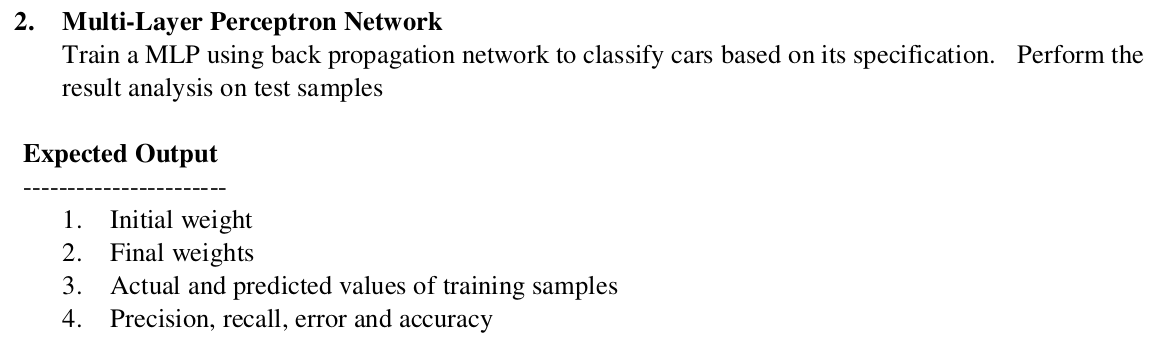

In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, mean_squared_error

In [11]:
df = pd.read_csv('car_evaluation.csv')

In [12]:
df.columns = ['buying','maint','doors','persons','lug_boot','safety','classes']

df.buying.replace(('vhigh','high','med','low'),(1,2,3,4), inplace=True)
df.maint.replace(('vhigh','high','med','low'),(1,2,3,4), inplace=True)
df.doors.replace(('2','3','4','5more'),(1,2,3,4), inplace=True)
df.persons.replace(('2','4','more'),(1,2,3), inplace=True)
df.lug_boot.replace(('small','med','big'),(1,2,3), inplace=True)
df.safety.replace(('low','med','high'),(1,2,3), inplace=True)
df.classes.replace(('unacc','acc','good','vgood'),(1,2,3,4), inplace=True)

In [13]:
x = df.iloc[:,0:6]
y = np.asarray(df.iloc[:,6], dtype="S6")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35, random_state=20)

In [14]:
model = MLPClassifier(solver="lbfgs", alpha=1e-5, hidden_layer_sizes=(3, 2), random_state=20, learning_rate_init=lr, max_iter=epoch, verbose=10)
model.fit(x_train, y_train)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           41     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.14916D+00    |proj g|=  4.00011D+00

At iterate    1    f=  1.31487D+00    |proj g|=  3.72679D-01

At iterate    2    f=  1.05399D+00    |proj g|=  3.63986D-01

At iterate    3    f=  8.96701D-01    |proj g|=  1.00709D-01

At iterate    4    f=  8.76341D-01    |proj g|=  4.20296D-02

At iterate    5    f=  8.69513D-01    |proj g|=  3.11217D-02

At iterate    6    f=  8.65409D-01    |proj g|=  1.61434D-02

At iterate    7    f=  8.63248D-01    |proj g|=  9.41808D-03

At iterate    8    f=  8.61514D-01    |proj g|=  1.22294D-02

At iterate    9    f=  8.60924D-01    |proj g|=  1.50550D-02

At iterate   10    f=  8.60198D-01    |proj g|=  5.68804D-03

At iterate   11    f=  8.59845D-01    |proj g|=  4.11342D-03

At iterate   12    f=  8.59675D-01    |proj g|=  5.01203D-03

At iterate   13    f=  8.5

 This problem is unconstrained.


At iterate  177    f=  2.88973D-01    |proj g|=  1.33471D-01

At iterate  178    f=  2.88934D-01    |proj g|=  4.35980D-02

At iterate  179    f=  2.88903D-01    |proj g|=  2.57667D-02

At iterate  180    f=  2.88828D-01    |proj g|=  1.21229D-01

At iterate  181    f=  2.88773D-01    |proj g|=  1.02598D-01

At iterate  182    f=  2.88699D-01    |proj g|=  2.67752D-02

At iterate  183    f=  2.88662D-01    |proj g|=  4.13640D-02

At iterate  184    f=  2.88627D-01    |proj g|=  3.08535D-02

At iterate  185    f=  2.88627D-01    |proj g|=  3.38505D-01

At iterate  186    f=  2.88565D-01    |proj g|=  3.60710D-02

At iterate  187    f=  2.88527D-01    |proj g|=  1.06982D-01

At iterate  188    f=  2.88492D-01    |proj g|=  1.01805D-01

At iterate  189    f=  2.88467D-01    |proj g|=  6.76993D-02

At iterate  190    f=  2.88455D-01    |proj g|=  3.00913D-02

At iterate  191    f=  2.88444D-01    |proj g|=  3.18287D-02

At iterate  192    f=  2.88413D-01    |proj g|=  3.03550D-01

At itera

/home/gaga/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3, 2), learning_rate_init=0.8,
              random_state=20, solver='lbfgs', verbose=10)

In [15]:
print('Actual Values', y_test)
print('Predicted Values')
y_pred = model.predict(x_test)
print(y_pred)

Actual Values [b'2' b'2' b'1' b'4' b'1' b'1' b'4' b'2' b'1' b'3' b'1' b'1' b'2' b'1'
 b'1' b'2' b'1' b'2' b'1' b'2' b'1' b'1' b'1' b'1' b'2' b'3' b'1' b'2'
 b'2' b'1' b'1' b'1' b'1' b'2' b'1' b'1' b'1' b'1' b'1' b'1' b'1' b'2'
 b'1' b'1' b'1' b'1' b'1' b'1' b'1' b'1' b'1' b'2' b'3' b'1' b'2' b'1'
 b'1' b'1' b'1' b'1' b'1' b'1' b'1' b'2' b'2' b'1' b'1' b'1' b'2' b'1'
 b'1' b'1' b'1' b'1' b'1' b'2' b'2' b'1' b'2' b'1' b'2' b'1' b'1' b'2'
 b'2' b'2' b'1' b'3' b'2' b'1' b'1' b'1' b'1' b'1' b'1' b'1' b'4' b'1'
 b'1' b'2' b'1' b'1' b'2' b'1' b'1' b'2' b'1' b'1' b'1' b'2' b'1' b'1'
 b'2' b'1' b'1' b'2' b'1' b'1' b'1' b'1' b'1' b'2' b'1' b'1' b'1' b'1'
 b'1' b'1' b'2' b'1' b'2' b'3' b'4' b'2' b'2' b'1' b'2' b'2' b'2' b'2'
 b'1' b'2' b'1' b'1' b'1' b'2' b'1' b'1' b'2' b'2' b'1' b'1' b'1' b'1'
 b'2' b'1' b'1' b'1' b'1' b'2' b'1' b'1' b'1' b'2' b'2' b'1' b'1' b'1'
 b'1' b'1' b'1' b'1' b'1' b'3' b'1' b'1' b'1' b'2' b'1' b'1' b'1' b'2'
 b'1' b'2' b'2' b'1' b'1' b'1' b'1' b'2' b'1' b'1' b'1' b'2' b'

In [16]:
print(classification_report(y_pred, y_test))
print('Accuracy: ', model.score(x_test, y_test))
print('Error: ', mean_squared_error(y_test, y_pred))

              precision    recall  f1-score   support

        b'1'       0.95      0.94      0.94       435
        b'2'       0.75      0.76      0.76       136
        b'3'       0.37      0.35      0.36        20
        b'4'       0.71      0.86      0.77        14

    accuracy                           0.88       605
   macro avg       0.69      0.73      0.71       605
weighted avg       0.88      0.88      0.88       605

Accuracy:  0.8776859504132232
Error:  0.12727272727272726


/home/gaga/.local/lib/python3.8/site-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
/home/gaga/.local/lib/python3.8/site-packages/sklearn/metrics/_regression.py:96: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)
